Notebook correspondant à la section 3.1 du rapport.
Détermination du taux d'apprentissage idéal pour la descente de gradient dans l'exemple à deux dimensions.

In [15]:
#imports
from numpy import pi, cos, sin, zeros, linspace, matmul, arange, identity, argmin
from numpy.linalg import eigvals

from matplotlib.pyplot import plot, show, title, ylim

Paramètres du modèle

In [16]:
#nombre de coefficients de Fourier ajustables
H = 10
H_range = arange(H) +1
# nombre de points pour la variable indépendante
N = 100

t_a = 0
t_b = 1
#liste des points de test
T = linspace(t_a,t_b,N)

W = 2*pi

Matrice $\mathcal{M}$ telle que $\vec{g} = \mathcal{M} \vec{A} + \vec{d}$

In [17]:
#matrice de coefficients (m*W*T[i]) de taille NxM
#avec première coordonnée i, et deuxème m
m_w_T = W*matmul(T.reshape((N,1)), H_range.reshape((1,H)))
cos = cos(m_w_T)
sin = sin(m_w_T)

mat = zeros((2*H,2*H))

for l in range(1,H+1) :
    for m in range(1,H+1) :
        for i in range(N) :
            mat[l-1,m-1] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]
            mat[l-1,m-1] += ((1-l)*cos[i,l-1]-1)*((1-m)*cos[i,m-1]-1)

            mat[l-1,m-1+H] += (1-l)*sin[i,l-1]*((m-1)*cos[i,m-1]+1)
            mat[l-1,m-1+H] += (1-m)*sin[i,m-1]*((1-l)*cos[i,l-1]-1)

            mat[l-1+H,m-1] += ((l-1)*cos[i,l-1]+1)*(1-m)*sin[i,m-1]
            mat[l-1+H,m-1] += (1-l)*sin[i,l-1]*((1-m)*cos[i,m-1]-1)

            mat[l-1+H,m-1+H] += ((l-1)*cos[i,l-1]+1)*((m-1)*cos[i,m-1]+1)
            mat[l-1+H,m-1+H] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]

mat *= W**2



Calcul des valeurs propres de la matrice $\mathcal{R}_\alpha = \mathcal{I}_M - \alpha \mathcal{M}$ puis détermination du module maximum parmis celles-ci.

In [18]:
alpha_list = linspace(0, 1e-5, 10000)
max_mod = []

alpha_c = 0

for alpha in alpha_list :
    R = identity(2*H)-alpha*mat
    vals_propres = eigvals(R)
    v_max = max(abs(vals_propres))
    max_mod.append(v_max)
    if v_max <= 1 :
        alpha_c = alpha

alpha_min = alpha_list[argmin(max_mod)]
print("alpha_min = {}, alpha_c = {}, minimum spectral radius = {}".format(alpha_min,alpha_c, min(max_mod)))


alpha_min = 6.0906090609060915e-06, alpha_c = 6.1146114611461156e-06, minimum spectral radius = 0.9921005053484849


Affichage des résultats

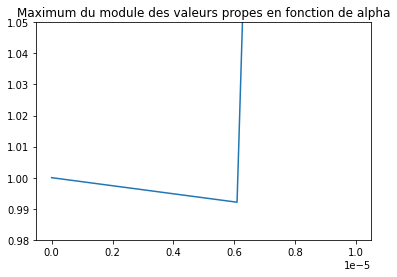

In [19]:
plot(alpha_list, max_mod)
title("Maximum du module des valeurs propes en fonction de alpha")
ylim((0.98, 1.05))
show()